In [1]:
import scanpy as sc
import schist as scs
import pandas as pd
import time
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
technology = ['10XV3', 'Quartzseq', 'MARSseq', 'iCELL8']
times = pd.DataFrame(0, index=technology, columns=['NSBM', 'PPBM', 'Leiden'])

In [8]:
sc.settings.verbosity=2

In [9]:
for t in technology:
    adata = sc.read(f"{t}_075.h5ad")
    s = time.time()
    scs.inference.leiden(adata)
    e = time.time()
    times.loc[t, 'Leiden'] = e - s
    s = time.time()
    scs.inference.planted_model(adata)
    e = time.time()
    times.loc[t, 'PPBM'] = e - s
    s = time.time()
    scs.inference.nested_model(adata)
    e = time.time()
    times.loc[t, 'NSBM'] = e - s    

running Leiden clustering
    finished (0:00:24)
minimizing the Planted Partition Block Model
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
    done (0:01:33)
    finished (0:01:34)
minimizing the nested Stochastic Block Model
    done (0:03:28)
    finished (0:03:29)
running Leiden clustering
    finished (0:00:16)
minimizing the Planted Partition Block Model
    done (0:00:30)
    finished (0:00:30)
minimizing the nested Stochastic Block Model
    done (0:02:10)
    finished (0:02:10)
running Leiden clustering
    finished (0:00:24)
minimizing the Planted Partition Block Model
    done (0:01:09)
    finished (0:01:09)
minimizing the nested Stochastic Block Model
    done (0:06:10)
    finished (0:06:10)
running Leiden clustering
    finished (0:00:

In [10]:
times

,NSBM,PPBM,Leiden
10XV3,209.437782,94.105463,24.403320
Quartzseq,130.632305,30.853019,16.178420
MARSseq,371.020038,70.079823,24.761474
iCELL8,546.242520,91.833160,34.442437


In [11]:
gprop = pd.DataFrame(0, index=technology, columns=['num_vertices', 'num_edges'])
for t in technology:
    adata = scs.io.read(f"{t}_075")
    g = adata.uns['schist']['state'].g
    gprop.loc[t] = [g.num_vertices(), g.num_edges()]

In [13]:
results = pd.concat([gprop, times], axis=1)

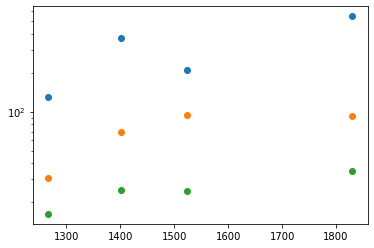

In [20]:
scatter(results['num_vertices'], results['NSBM'])
scatter(results['num_vertices'], results['PPBM'])
scatter(results['num_vertices'], results['Leiden'])
yscale('log')

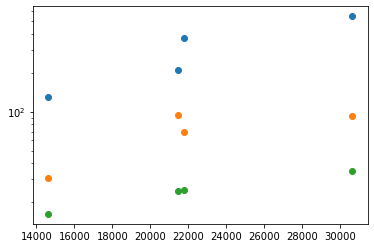

In [19]:
scatter(results['num_edges'], results['NSBM'])
scatter(results['num_edges'], results['PPBM'])
scatter(results['num_edges'], results['Leiden'])
yscale('log')

In [21]:
results.to_pickle("Results_HCA.pickle")

In [22]:
adata = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


In [35]:
int(np.sqrt(adata.shape[0])/2)

26

In [24]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=int(np.sqrt(adata.shape[0])/2))

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:17)


In [25]:
s = time.time()
scs.inference.leiden(adata)
e = time.time()
times.loc['Paul15', 'Leiden'] = e - s



s = time.time()
scs.inference.planted_model(adata)
e = time.time()
times.loc['Paul15', 'PPBM'] = e - s
s = time.time()
scs.inference.nested_model(adata)
e = time.time()
times.loc['Paul15', 'NSBM'] = e - s







running Leiden clustering
    finished (0:01:21)


In [28]:
g = adata.uns['schist']['state'].g

In [29]:
gprop.loc['Paul15', 'num_vertices'] = g.num_vertices()
gprop.loc['Paul15', 'num_edges'] = g.num_edges()

In [31]:
results = pd.concat([gprop, times], axis=1)

In [33]:
results.to_pickle("Timing_results.pickle")

In [42]:
adata = sc.read("planaria.h5ad")
sc.pp.neighbors(adata, n_neighbors=10)



computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02)


In [43]:
results.loc['Planaria'] = 0

In [44]:
g = scs._utils.get_graph_tool_from_adjacency(adata.obsp['connectivities'], directed=False)

In [45]:
results.loc['Planaria', ['num_vertices', 'num_edges']] = g.num_vertices(), g.num_edges()

In [46]:
results

,num_vertices,num_edges,NSBM,PPBM,Leiden
10XV3,1523.0,21447.0,209.437782,94.105463,24.403320
Quartzseq,1266.0,14603.0,130.632305,30.853019,16.178420
MARSseq,1401.0,21756.0,371.020038,70.079823,24.761474
iCELL8,1830.0,30636.0,546.242520,91.833160,34.442437
Paul15,2730.0,51475.0,737.752539,215.315428,81.292665
Planaria,21612.0,173667.0,0.000000,0.000000,0.000000


In [47]:
s = time.time()
scs.inference.leiden(adata)
e = time.time()
results.loc['Planaria', 'Leiden'] = e - s
s = time.time()
scs.inference.planted_model(adata)
e = time.time()
results.loc['Planaria', 'PPBM'] = e - s
s = time.time()
scs.inference.nested_model(adata)
e = time.time()
results.loc['Planaria', 'NSBM'] = e - s








running Leiden clustering
    finished (0:06:32)
minimizing the Planted Partition Block Model
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
    done (0:34:09)
    finished (0:34:09)
minimizing the nested Stochastic Block Model
    done (3:17:05)
    finished (3:17:06)


In [48]:
results.to_pickle("Timing_results.pickle")

In [49]:
results

,num_vertices,num_edges,NSBM,PPBM,Leiden
10XV3,1523.0,21447.0,209.437782,94.105463,24.403320
Quartzseq,1266.0,14603.0,130.632305,30.853019,16.178420
MARSseq,1401.0,21756.0,371.020038,70.079823,24.761474
iCELL8,1830.0,30636.0,546.242520,91.833160,34.442437
Paul15,2730.0,51475.0,737.752539,215.315428,81.292665
Planaria,21612.0,173667.0,11828.548317,2052.126740,392.288606


In [50]:
scs.io.write(adata, "Planaria_schist")

In [64]:
for i in results['NSBM']:
    
    h = int(i) // 3600
    m = (int(i) // 60) - h*60
    s = int(i) % 60 
    print(f"{h}:{m:02d}:{s:02d}")


0:03:29
0:02:10
0:06:11
0:09:06
0:12:17
3:17:08
